### 1、Import tensorflow and use tensorflow to define a constant.

In [16]:
import tensorflow as tf
import os
hello = tf.constant("Welcome to Huawei")
print(hello)

tf.Tensor(b'Welcome to Huawei', shape=(), dtype=string)


### 2、Use tensorflow to print 'Welcome to Huawei'.

In [20]:
tf.print(hello)

Welcome to Huawei


### 3、Use tensorflow to define two numeric constants,then calculate them and print the result.

In [22]:
num1 =  tf.constant(1)
num2 =  tf.constant(2)
tf.print(num1 + num2)

3


### 4、Randomly generate two matrices using tensorflow, calculate and print the result of their multiplication.

In [34]:
m1 = tf.random.normal([2,3], 0, 5, tf.float32)
m2 = tf.random.normal([3,2], 0, 5, tf.float32)
c = tf.matmul(m1, m2)
tf.print(c)

[[29.2495975 62.650032]
 [60.2348366 -21.7922554]]


### 5、Try to use your own handwriting number to do image recognition

In [55]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [57]:
# нормализация
x_train = x_train / 255
x_test = x_test / 255

In [58]:
#преобразование данных в векторы по категориям
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

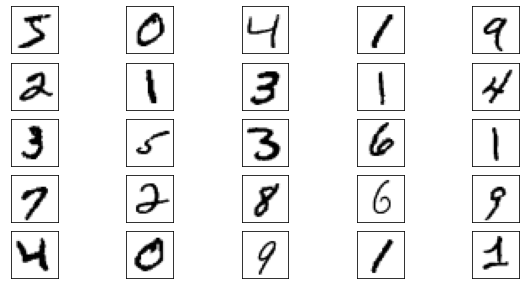

In [59]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [60]:
#формирование модели и вывод ее в консоль
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])
print(model.summary())  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 107,440
Trainable params: 107,440
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [62]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)
model.evaluate(x_test, y_test_cat)

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 0.4781 - accuracy: 0.8599 - val_loss: 0.1556 - val_accuracy: 0.9537
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1186 - accuracy: 0.9647 - val_loss: 0.1228 - val_accuracy: 0.9646
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0775 - accuracy: 0.9761 - val_loss: 0.1111 - val_accuracy: 0.9690
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0534 - accuracy: 0.9830 - val_loss: 0.1025 - val_accuracy: 0.9712
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0419 - accuracy: 0.9857 - val_loss: 0.1034 - val_accuracy: 0.9708
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0334 - accuracy: 0.9902 - val_loss: 0.1108 - val_accuracy: 0.9718
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0295 - accuracy: 0.9899 - val_loss: 0.0994 - val_accuracy:

[0.11084151268005371, 0.9726999998092651]

[[1.9680042e-09 9.9999964e-01 3.8172754e-10 5.9023282e-14 1.9679694e-10
  3.7331961e-14 4.2967679e-10 3.5993833e-07 4.1213780e-10 2.4318753e-10]]
Распознанная цифра: 1


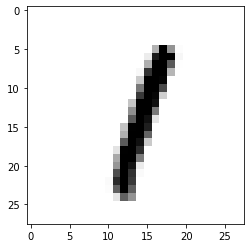

In [63]:
n = 5
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( f"Распознанная цифра: {np.argmax(res)}" )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [64]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


[[9.9999917e-01 1.6194011e-08 4.8618051e-07 4.1189374e-15 1.9582021e-15
  1.1737723e-10 3.2665653e-07 1.5633809e-08 1.9193926e-12 3.4135915e-08]]
Распознанная цифра: 0


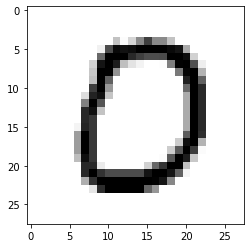

In [65]:
n = 10
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( f"Распознанная цифра: {np.argmax(res)}" )
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [66]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(273, 28, 28)


In [67]:
test_acc = model.evaluate(x_test, y_test_cat)
print('Оценка точности', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9727
Оценка точности [0.11084151268005371, 0.9726999998092651]


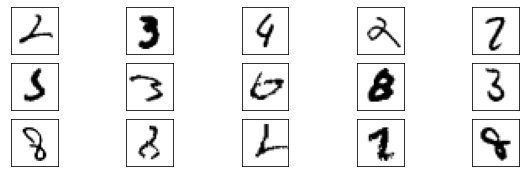

In [68]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()